In [2]:
import sys
sys.path.insert(1, '../GBT_pipeline')
from synthetic_real import create_true, create_full_cadence, create_false, create_true_single_shot, create_true_faster
import matplotlib.pyplot as plt
import numpy as np 
from single_search import search
from execute_model import model_load
import tensorflow as tf
from numba import njit, jit, prange


In [4]:
NUM_SAMPLES = 10
factor =1

print("Loading in plate")
plate = np.load('../../real_filtered.npy')
print("Creating False")

false_data = create_full_cadence(create_false, plate = plate, samples = NUM_SAMPLES, snr_base=5, snr_range=20)
print("Creating True")

true_data = create_full_cadence(create_true_faster, plate = plate, samples = NUM_SAMPLES, snr_base=5, snr_range=20, factor=factor)
print("Creating Single Shot True")

true_single_shot = create_full_cadence(create_true_single_shot, plate = plate, samples = NUM_SAMPLES, snr_base=5, snr_range=20,factor=factor)

Loading in plate
Creating False
Creating True
Creating Single Shot True


In [22]:
def average(y1,y2):
    slope = (y2-y1)/256
    tot = []
    for x in range(256):
        tot.append(x*slope+y1)
    return  tot
        

In [51]:
%matplotlib inline
samples = 1000
true_single_shot = create_full_cadence(create_true_single_shot, plate = plate, samples = samples, 
                                       snr_base=500, snr_range=20,factor=factor)

result = []
for i in range(samples):
    spec = np.sum(true_single_shot[i,0,:,:], axis=0)
    x = np.arange(256)
    z = np.polyfit(x, spec, deg=1)
    p = np.poly1d(z)
    chan_fit = p(x)
#     print(chan_fit.shape)
    expec = np.mean(chan_fit)
    real = np.mean(spec)
    result.append(real/expec)
#     print(real/expec)
    
#     plt.figure(figsize=(10,4))
#     plt.xlabel("Fchans")
#     plt.ylabel("Count")
#     plt.plot(x,spec,x,chan_fit )
#     plt.show()
print(np.mean(result))

1.0000000000000002


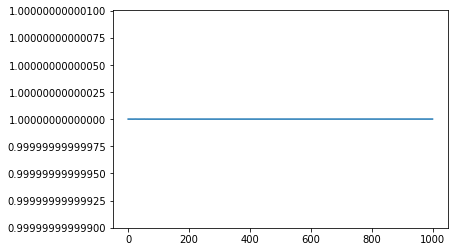

In [47]:
plt.plot(result)

In [52]:
stuff = [0,0,0,0,5,0]
stuff2 = [1,1,1,1,1,0]
print(np.mean(stuff)-np.mean(stuff2))

0.0
